In [15]:
import numpy as np
import matplotlib.pyplot as plt
from Dirac_FXC import Dirac_FXC
from ase.units import *
from scipy.optimize import curve_fit
from gpaw.response.qeh import Heterostructure

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [16]:
a=3.193 # lattice parameter
t=1.10  # effective hopping parameter
delta=1.66/2  # gap
r0=33.875 # screening length

In [17]:
a/=Bohr
t/=Hartree
delta/=Hartree

In [18]:
v=a*t
m=delta/v/v

In [19]:
def polarization(q):
    k=v*q
    result=-q*q/np.pi*(delta/k/k+(1-4*delta*delta/k/k)*np.arctan(k/2/delta)/2/k)
    return result
def coulomb(q):
    return 2*np.pi/q
def epsilon(q):
    return 1-coulomb(q)*polarization(q)

In [20]:
l=a*t/delta*Bohr

In [21]:
d0=6.5; #thikness of monolayer MoS2 
HS = Heterostructure(structure=['1H-MoS2'],d=[],include_dipole=True,wmax=0,qmax=np.pi,d0=d0)
q_real, w, eps_real= HS.get_macroscopic_dielectric_function()

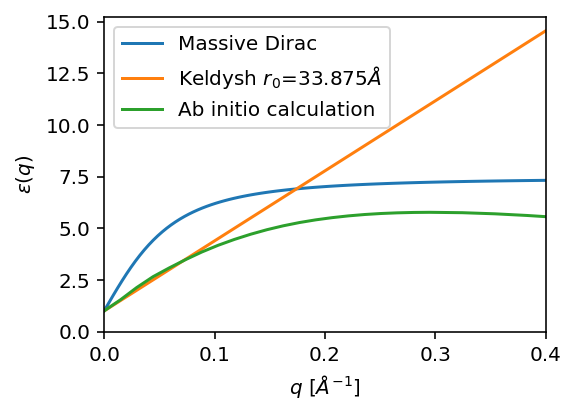

In [23]:
q=np.linspace(1e-4,0.4*l,100)
plt.figure(figsize=(4,3))
plt.plot(q/l,epsilon(q),label='Massive Dirac')
plt.plot(q/l,1+r0*q/l,label=r'Keldysh $r_0$=33.875$\AA$')
plt.plot(q_real,eps_real,label=r'Ab initio calculation')
plt.xlim([0,0.4])
plt.ylim([0,None])
plt.legend()
plt.xlabel(r'$q$ [$\AA^{-1}$]')
plt.ylabel(r'$\epsilon(q)$')
plt.tight_layout()
plt.savefig('epsilon.png',dpi=200)

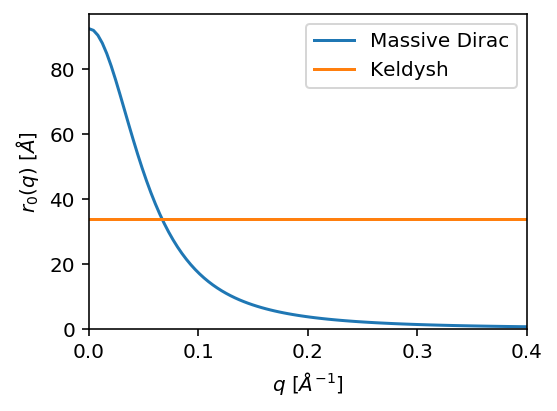

In [8]:
q=np.linspace(1e-4,0.4*l,100)
plt.figure(figsize=(4,3))
plt.plot(q/l,l*np.gradient(epsilon(q),q),label='Massive Dirac')
plt.plot(q/l,r0*np.ones(100),label=r'Keldysh')

plt.legend()
plt.xlim([0,0.4])
plt.ylim([0,None])
plt.xlabel(r'$q$ [$\AA^{-1}$]')
plt.ylabel(r'$r_0(q)$ [$\AA$]')
plt.tight_layout()
plt.savefig('r0.png',dpi=200)

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


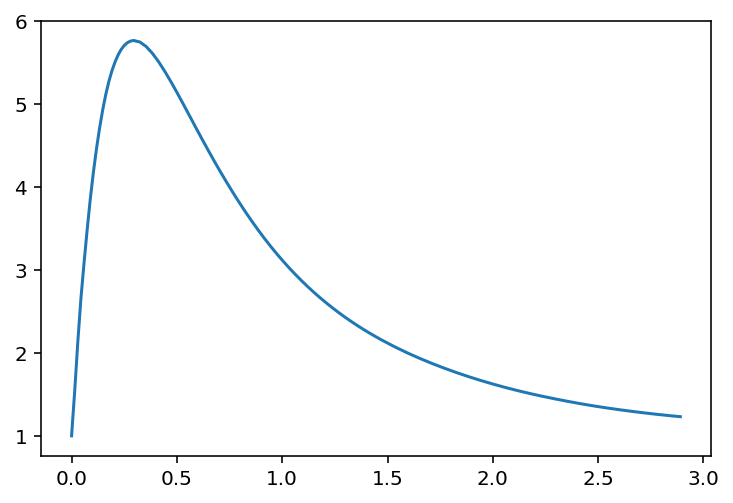

In [14]:
plt.plot(q,eps)